### Deep Learning: Classification with Keras
___

#### Summary:

Deep Learning has grown in popularity recently due to better GPUs and the large amount of data we have access to. Combining the large amount of data with better GPUs, we are able to train deep neural networks in a reasonable amount of time that outperform traditional machine learning models such as Logistic/Softmax Regression, SVM, Naive Bayes, K-Nearest Neighbor, etc.

When building a deep neural network, it is common to use APIs like Tensorflow and Keras. Tensorflow is an API that runs on top of Python and contains many useful low-level functions. Keras is an API that runs on top of TensorFlow and has many high-level functions but is usually more restrictive. When building a neural network, Keras will usually contain all the tools we need. Note that we will not get into hyperparameter tuning here and we will not use a validation set (The test set is used as the validaiton set here).
___
#### This notebook will include:
1. Softmax Regression
2. 3-Layer Standard Neural Network (Multilayer Perceptron)
3. 8-Layer Standard Neural Network
4. 3-Layer Convolutional Network
5. 8-Layer Convolutional Network
6. Inception Network
7. Residual Network
___
#### Reference: 

Much of what is in this notebook was learned from the Deep Learning Specialization Coursera course by Andrew Ng, the Udemy A-Z: Deep Learning course, and the Tensorflow tutorial at https://www.tensorflow.org/get_started/mnist/pros 

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
X_train: (55000, 784)
X_test: (10000, 784)
y_train: (55000, 10)
y_test: (10000, 10)
X_train_image: (55000, 28, 28, 1)
X_test_image: (10000, 28, 28, 1)


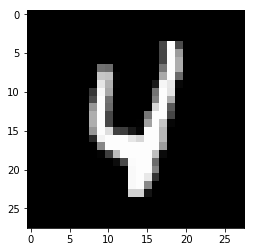

In [4]:
"""
The dataset that will be used for this notebook is the MNIST dataset which consists of hand-drawn digits
ranging from 0 to 9. The dataset is separated into 55000 training examples, 5000 validation examples
and 10000 test examples. Each example consists of 784 input features corresponding to the 784 pixel 
values of the 28x28 sized image. The dataset has already been preprocessed (divided by 255).
"""
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, MaxPooling2D, ZeroPadding2D, Conv2D
from keras.layers import Concatenate, Input, BatchNormalization, Activation, Add, Flatten

%matplotlib inline

# Import the dataset (one-hot encoded)
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True)

X_train = dataset.train.images
y_train = dataset.train.labels
X_test = dataset.test.images
y_test = dataset.test.labels

X_train_image = X_train.reshape( -1, 28, 28, 1)
X_test_image = X_test.reshape( -1, 28, 28, 1)

# Printing the dataset shape
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('X_train_image:', X_train_image.shape)
print('X_test_image:', X_test_image.shape)

# Display an example from the dataset
sample = Image.fromarray(255*X_train[np.random.randint(X_train.shape[0]), :].reshape(28,28))
plt.imshow(sample)

In [5]:
# Softmax Regression
"""
The simplest approach to a classification problem with more than 2 categories is to apply softmax
regression. Since softmax regression is essentially a single-layer neural network, it is expected
to perform poorly. 
"""

# Create the softmax regression model
classifier = Sequential()
classifier.add(Dense(units = 10, input_dim = 784, activation = 'softmax', name = 'dense'))

# Compile
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit
classifier.fit(X_train, y_train, batch_size = 128, epochs = 100)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 2s 40us/step - loss: 0.6830 - acc: 0.8337
Epoch 2/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.3703 - acc: 0.8994
Epoch 3/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.3259 - acc: 0.9103
Epoch 4/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.3050 - acc: 0.9150
Epoch 5/100
55000/55000 [==============================] - 2s 36us/step - loss: 0.2923 - acc: 0.9184
Epoch 6/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.2838 - acc: 0.9208
Epoch 7/100
55000/55000 [==============================] - 2s 39us/step - loss: 0.2774 - acc: 0.9226
Epoch 8/100
55000/55000 [==============================] - 2s 38us/step - loss: 0.2722 - acc: 0.9241
Epoch 9/100
55000/55000 [==============================] - 2s 36us/step - loss: 0.2684 - acc: 0.9253
Epoch 10/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.2654 - a

55000/55000 [==============================] - 2s 41us/step - loss: 0.2239 - acc: 0.9378
Epoch 82/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.2236 - acc: 0.9379
Epoch 83/100
55000/55000 [==============================] - 2s 40us/step - loss: 0.2236 - acc: 0.9380
Epoch 84/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.2232 - acc: 0.9379
Epoch 85/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.2229 - acc: 0.9381
Epoch 86/100
55000/55000 [==============================] - 2s 38us/step - loss: 0.2230 - acc: 0.9383
Epoch 87/100
55000/55000 [==============================] - 2s 39us/step - loss: 0.2227 - acc: 0.9379
Epoch 88/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.2227 - acc: 0.9378
Epoch 89/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.2228 - acc: 0.9380
Epoch 90/100
55000/55000 [==============================] - 2s 42us/step - loss: 0.2223 - acc: 

In [6]:
# Summary Softmax Regression
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 3-Layer Standard Neural Network
"""
A 3-layer neural network, although not deep, usually has enough layers to outperform traditional 
Machine Learning algorithms. These extra layers allow the network to learn more complex features 
that can be useful for classification. 
"""

# Create the 3-layer neural network
classifier = Sequential()
classifier.add(Dense(units = 32, input_dim = 784, activation = 'relu', name = 'dense_1'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_2'))
classifier.add(Dense(units = 10, activation = 'softmax', name = 'dense_3'))

# Compile
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit
classifier.fit(X_train, y_train, batch_size = 128, epochs = 100)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 3s 54us/step - loss: 0.5102 - acc: 0.8555
Epoch 2/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.2312 - acc: 0.9342
Epoch 3/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.1861 - acc: 0.9459
Epoch 4/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.1591 - acc: 0.9530
Epoch 5/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.1394 - acc: 0.9585
Epoch 6/100
55000/55000 [==============================] - 3s 49us/step - loss: 0.1251 - acc: 0.9622
Epoch 7/100
55000/55000 [==============================] - 3s 47us/step - loss: 0.1141 - acc: 0.9660
Epoch 8/100
55000/55000 [==============================] - 3s 50us/step - loss: 0.1034 - acc: 0.9697
Epoch 9/100
55000/55000 [==============================] - 3s 49us/step - loss: 0.0960 - acc: 0.9716
Epoch 10/100
55000/55000 [==============================] - 3s 56us/step - loss: 0.0876 - a

55000/55000 [==============================] - 3s 48us/step - loss: 0.0011 - acc: 0.9999
Epoch 82/100
55000/55000 [==============================] - 3s 48us/step - loss: 7.1561e-04 - acc: 1.0000
Epoch 83/100
55000/55000 [==============================] - 3s 48us/step - loss: 4.8545e-04 - acc: 1.0000
Epoch 84/100
55000/55000 [==============================] - 3s 48us/step - loss: 4.5895e-04 - acc: 1.0000
Epoch 85/100
55000/55000 [==============================] - 3s 48us/step - loss: 4.5257e-04 - acc: 1.0000
Epoch 86/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.0021 - acc: 0.9994
Epoch 87/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.0328 - acc: 0.9911
Epoch 88/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.0043 - acc: 0.9987
Epoch 89/100
55000/55000 [==============================] - 3s 48us/step - loss: 0.0026 - acc: 0.9993
Epoch 90/100
55000/55000 [==============================] - 3s 48us/step - loss

In [8]:
# Summary 3-Layer Standard Neural Network
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 8-Layer Standard Neural Network
"""
An 8-layer neural network is considered a deep network. Because it has more layers it should be 
able to learn even more complex features that can be useful for classification, however, since
it is deeper it is more prone to overfitting which is why we apply some regularization.
"""

# Create the 8-layer neural network
classifier = Sequential()
classifier.add(Dense(units = 32, input_dim = 784, activation = 'relu', name = 'dense_1'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_2'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_3'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_4'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_5'))
classifier.add(Dropout(rate = 0.3, name = 'dropout_5'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_6'))
classifier.add(Dropout(rate = 0.3, name = 'dropout_6'))
classifier.add(Dense(units = 32, activation = 'relu', name = 'dense_7'))
classifier.add(Dropout(rate = 0.3, name = 'dropout_7'))
classifier.add(Dense(units = 10, activation = 'softmax', name = 'dense_8'))

# Compile
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit
classifier.fit(X_train, y_train, batch_size = 128, epochs = 100)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 5s 90us/step - loss: 1.2092 - acc: 0.5538
Epoch 2/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.5473 - acc: 0.8298
Epoch 3/100
55000/55000 [==============================] - 4s 74us/step - loss: 0.4074 - acc: 0.8870
Epoch 4/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.3286 - acc: 0.9110
Epoch 5/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.2909 - acc: 0.9225
Epoch 6/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.2639 - acc: 0.9303
Epoch 7/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.2386 - acc: 0.9379
Epoch 8/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.2210 - acc: 0.9423
Epoch 9/100
55000/55000 [==============================] - 4s 74us/step - loss: 0.2040 - acc: 0.9470
Epoch 10/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.1878 - a

55000/55000 [==============================] - 4s 78us/step - loss: 0.0570 - acc: 0.9858
Epoch 82/100
55000/55000 [==============================] - 4s 79us/step - loss: 0.0514 - acc: 0.9871
Epoch 83/100
55000/55000 [==============================] - 4s 79us/step - loss: 0.0541 - acc: 0.9869
Epoch 84/100
55000/55000 [==============================] - 4s 79us/step - loss: 0.0486 - acc: 0.9877
Epoch 85/100
55000/55000 [==============================] - 4s 79us/step - loss: 0.0499 - acc: 0.9880
Epoch 86/100
55000/55000 [==============================] - 4s 80us/step - loss: 0.0510 - acc: 0.9875
Epoch 87/100
55000/55000 [==============================] - 4s 78us/step - loss: 0.0492 - acc: 0.9878
Epoch 88/100
55000/55000 [==============================] - 4s 78us/step - loss: 0.0457 - acc: 0.9887
Epoch 89/100
55000/55000 [==============================] - 4s 79us/step - loss: 0.0444 - acc: 0.9892
Epoch 90/100
55000/55000 [==============================] - 4s 79us/step - loss: 0.0491 - acc: 

In [10]:
# Summary 8-Layer Standard Neural Network
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
__________

In [12]:
# 3-layer ConvNet
"""
A Convolutional neural network performs much better than standard neural networks when it comes to 
computer vision tasks. This is because it tries to learn features or rather feature detectors from 
batches of pixels, taking into account the shape of the image. The parameters learned come in the 
form of filters. There are also considerable fewer parameters, which result from parameter sharing 
and sparsity of connections. This particular ConvNet has 2 convolutional layer and 1 fully-connected 
layers.
"""

# Create the 3-layer CNN
classifier = Sequential()
classifier.add(Conv2D(64, (5, 5), input_shape = (28, 28, 1), activation = 'relu', name = 'conv2d_1'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'maxpool2d_1'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu', name = 'conv2d_2'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'maxpool2d_2'))
classifier.add(Flatten(name = 'flatten_2'))
classifier.add(Dense(units = 10, activation = 'softmax', name = 'dense_3'))

# Compile
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit
classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 25)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])

Epoch 1/25
55000/55000 [==============================] - 6s 109us/step - loss: 0.2425 - acc: 0.9303
Epoch 2/25
55000/55000 [==============================] - 6s 100us/step - loss: 0.0651 - acc: 0.9797
Epoch 3/25
55000/55000 [==============================] - 6s 102us/step - loss: 0.0464 - acc: 0.9859
Epoch 4/25
55000/55000 [==============================] - 6s 104us/step - loss: 0.0379 - acc: 0.9882
Epoch 5/25
55000/55000 [==============================] - 6s 100us/step - loss: 0.0299 - acc: 0.9907
Epoch 6/25
55000/55000 [==============================] - 6s 100us/step - loss: 0.0253 - acc: 0.9921
Epoch 7/25
55000/55000 [==============================] - 6s 100us/step - loss: 0.0220 - acc: 0.9933
Epoch 8/25
55000/55000 [==============================] - 6s 101us/step - loss: 0.0187 - acc: 0.9939
Epoch 9/25
55000/55000 [==============================] - 6s 101us/step - loss: 0.0147 - acc: 0.9953
Epoch 10/25
55000/55000 [==============================] - 6s 101us/step - loss: 0.0144 - a

In [13]:
# Summary 3-Layer ConvNet
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
maxpool2d_2 (MaxPooling2D)   (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                16010     
Total params: 54,602
Trainable params: 54,602
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 8-layer ConvNet
"""
The deeper a Convolutional network is, the more complex features it can learn. These complex 
features may be useful in classifying an image. This particular ConvNet has 5 convolutional 
layer and 3 fully-connected layers.
"""

# Create the 8-layer CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu', name = 'conv2d_1'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_2'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_3'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'maxpool2d_3'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_4'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_5'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'maxpool2d_5'))
classifier.add(Flatten(name = 'flatten_5'))
classifier.add(Dense(units = 128, activation = 'relu', name = 'dense_6'))
classifier.add(Dropout(rate = 0.3, name = 'dropout_6'))
classifier.add(Dense(units = 128, activation = 'relu', name = 'dense_7'))
classifier.add(Dropout(rate = 0.3, name = 'dropout_7'))
classifier.add(Dense(units = 10, activation = 'softmax', name = 'dense_8'))

# Compile
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit
classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 50)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])

Epoch 1/50
55000/55000 [==============================] - 11s 194us/step - loss: 0.3596 - acc: 0.8842
Epoch 2/50
55000/55000 [==============================] - 9s 166us/step - loss: 0.0937 - acc: 0.9731
Epoch 3/50
55000/55000 [==============================] - 9s 166us/step - loss: 0.0664 - acc: 0.9795
Epoch 4/50
55000/55000 [==============================] - 9s 165us/step - loss: 0.0537 - acc: 0.9848
Epoch 5/50
55000/55000 [==============================] - 9s 165us/step - loss: 0.0460 - acc: 0.9861
Epoch 6/50
55000/55000 [==============================] - 9s 165us/step - loss: 0.0370 - acc: 0.9892
Epoch 7/50
55000/55000 [==============================] - 9s 164us/step - loss: 0.0360 - acc: 0.9895
Epoch 8/50
55000/55000 [==============================] - 9s 166us/step - loss: 0.0319 - acc: 0.9903
Epoch 9/50
55000/55000 [==============================] - 9s 164us/step - loss: 0.0287 - acc: 0.9915
Epoch 10/50
55000/55000 [==============================] - 9s 164us/step - loss: 0.0255 - 

In [15]:
# Summary 8-Layer ConvNet
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
maxpool2d_3 (MaxPooling2D)   (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
maxpool2d_5 (MaxPooling2D)   (None, 3, 3, 32)          0         
__________

In [17]:
# Inception Network
"""
An inception network lets the network choose which filters to use when classifying an image. It is 
composed of many inception blocks where an inception block consists of many different convolutions 
with different filters concatenated into one. One would expect the inception network to have an
absurd amount of parameters but the inception network utilizes 1 by 1 convolutions to decrease the
amount of parameters by a considerable amount. The network below consists of 2 convolutional
layers followed by 3 inception blocks. The output of the last inception block is then flattened
and fed into a softmax layer.
"""

# Define the Inception block
def inception_block(input, layer):
    branch_1 = Conv2D(64, (1, 1), activation = 'relu', padding = 'same', 
                      name = 'conv2d_b1_'+str(layer))(input)
    branch_2 = Conv2D(64, (1, 1), activation = 'relu', padding = 'same', 
                      name = 'conv2d_b2_'+str(layer))(input)
    branch_2 = Conv2D(128, (3, 3), activation = 'relu', padding = 'same', 
                      name = 'conv2d_b2_'+str(layer+1))(branch_2)
    branch_3 = Conv2D(16, (1, 1), activation = 'relu', padding = 'same', 
                      name = 'conv2d_b3_'+str(layer))(input)
    branch_3 = Conv2D(32, (5, 5), activation = 'relu', padding = 'same', 
                      name = 'conv2d_b3_'+str(layer+1))(branch_3)
    branch_4 = MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = 'same', 
                            name = 'maxpool2d_b4_'+str(layer))(input)
    branch_4 = Conv2D(32, (1, 1), activation = 'relu', padding = 'same', 
                      name = 'conv2d_b4_'+str(layer+1))(branch_4)
    output = Concatenate(axis=-1, name = 'concat_'+str(layer+1))([branch_1, branch_2, branch_3, branch_4])
    return output

# Create the Inception Network
X_input = Input((28, 28, 1), name = 'Input')
X = Conv2D(64, (3, 3), activation = 'relu', padding = 'valid', name = 'conv2d_1')(X_input)
X = Conv2D(128, (3, 3), activation = 'relu', padding = 'valid', name = 'conv2d_2')(X)
X = MaxPooling2D(pool_size = (2, 2), name = 'maxpool2d_2')(X)
X = inception_block(X, layer = 3)
X = inception_block(X, layer = 5)
X = inception_block(X, layer = 7)
X = Flatten(name = 'flatten_8')(X)
X = Dense(units = 10, activation='softmax', name = 'dense_9')(X)

classifier = Model(inputs = X_input, outputs = X)

# Compile
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit
classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 20)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])

Epoch 1/20
55000/55000 [==============================] - 35s 636us/step - loss: 0.1377 - acc: 0.9573
Epoch 2/20
55000/55000 [==============================] - 33s 597us/step - loss: 0.0377 - acc: 0.9883
Epoch 3/20
55000/55000 [==============================] - 32s 586us/step - loss: 0.0263 - acc: 0.9917
Epoch 4/20
55000/55000 [==============================] - 32s 587us/step - loss: 0.0219 - acc: 0.9935
Epoch 5/20
55000/55000 [==============================] - 32s 584us/step - loss: 0.0173 - acc: 0.9944
Epoch 6/20
55000/55000 [==============================] - 32s 586us/step - loss: 0.0140 - acc: 0.9956
Epoch 7/20
55000/55000 [==============================] - 32s 588us/step - loss: 0.0126 - acc: 0.9961
Epoch 8/20
55000/55000 [==============================] - 32s 587us/step - loss: 0.0115 - acc: 0.9965
Epoch 9/20
55000/55000 [==============================] - 32s 585us/step - loss: 0.0088 - acc: 0.9973
Epoch 10/20
55000/55000 [==============================] - 32s 590us/step - loss: 

In [18]:
# Summary Inception Network
classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 64)   640         Input[0][0]                      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 24, 24, 128)  73856       conv2d_1[0][0]                   
__________________________________________________________________________________________________
maxpool2d_2 (MaxPooling2D)      (None, 12, 12, 128)  0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_b2_

In [23]:
# Residual Network
"""
Experiments have shown that very deep networks degrade. The intuition is that performance worsens 
because it is difficult for a deep network to learn an identity mapping between layers. Residual
networks (ResNets) combined with the use of batch normalization helps resolve this problem. Using a 
ResNet, we are able to train networks with over 100 layers without a drop in performance. This is 
because ResNets are able to easily learn an identity mapping between consecutive layers. A ResNet 
is made up of a series of residual blocks. These blocks contain a 'skip connection' that allows 
the gradient to be directly backpropagated to earlier layers. There are 2 main types of residual 
blocks; the identity block (input has same dimension as output) and the convolutional block (input 
has a different dimension from output). A ResNet is made up of a series of many of these different 
blocks. This particular Resnet consists of only 65 layers, however, they are more commonly used for
much deeper networks. Note that batch normalization acts as a regulator.
"""

# Define the identity block function (output dimension = input dimension)
def identity_block(input, filters, kernel_size, layer):
    F1, F2, F3 = filters 
    output = Conv2D(F1, (1, 1), padding = 'valid', name = 'conv2d_'+str(layer))(input)
    output = BatchNormalization(axis = -1, name = 'batchnorm_'+str(layer))(output)
    output = Activation('relu', name = 'relu_'+str(layer))(output)
    output = Conv2D(F2, (kernel_size, kernel_size), padding = 'same', 
                    name = 'conv2d_'+str(layer+1))(output)
    output = BatchNormalization(axis = -1, name = 'batchnorm_'+str(layer+1))(output)
    output = Activation('relu', name = 'relu_'+str(layer+1))(output)
    output = Conv2D(F3, (1, 1), padding = 'valid', name = 'conv2d_'+str(layer+2))(output)
    output = BatchNormalization(axis = -1, name = 'batchnorm_'+str(layer+2))(output)
    output = Add(name = 'add_'+str(layer+2))([output, input])
    output = Activation('relu', name = 'relu_'+str(layer+2))(output)
    
    return output
    
# Define the convolutional block function (output dimension != input dimension)
def convolutional_block(input, filters, kernel_size, strides, layer):
    F1, F2, F3 = filters
    output = Conv2D(F1, (1, 1), strides = (strides, strides), padding = 'valid', 
                    name = 'conv2d_'+str(layer))(input)
    output = BatchNormalization(axis = -1, name = 'batchnorm_'+str(layer))(output)
    output = Activation('relu', name = 'relu_'+str(layer))(output)
    output = Conv2D(F2, (kernel_size, kernel_size), padding = 'same', 
                    name = 'conv2d_'+str(layer+1))(output)
    output = BatchNormalization(axis = -1, name = 'batchnorm_'+str(layer+1))(output)
    output = Activation('relu', name = 'relu_'+str(layer+1))(output)
    output = Conv2D(F3, (1, 1), padding = 'valid', name = 'conv2d_'+str(layer+2))(output)
    output = BatchNormalization(axis = -1, name = 'batchnorm_'+str(layer+2))(output)
    output_sc = Conv2D(F3, (1, 1), strides = (strides, strides), padding = 'valid', 
                       name = 'conv2d_sc_'+str(layer))(input)
    output_sc = BatchNormalization(axis = -1, name = 'batchnorm_sc_'+str(layer))(output_sc)
    output = Add(name = 'add_'+str(layer+2))([output, output_sc])
    output = Activation('relu', name = 'relu_'+str(layer+2))(output)
    
    return output

# Create the Residual Network
X_input = Input((28, 28, 1), name = 'Input')
X = ZeroPadding2D((2, 2), name = 'zeropad2d')(X_input)
X = Conv2D(32, (3, 3), padding = 'same', strides = (2,2), name = 'conv2d_1')(X)
X = BatchNormalization(axis = -1, name = 'batchnorm_1')(X)
X = Activation('relu', name = 'relu_1')(X)
X = convolutional_block(X, filters = [32, 32, 128], kernel_size = 3, strides = 1, layer = 2)
X = identity_block(X, filters = [32, 32, 128], kernel_size = 3, layer = 5)
X = identity_block(X, filters = [32, 32, 128], kernel_size = 3, layer = 8)
X = convolutional_block(X, filters = [64, 64, 256], kernel_size = 3, strides = 2, layer = 11)
X = identity_block(X, filters = [64, 64, 256], kernel_size = 3, layer = 14)
X = identity_block(X, filters = [64, 64, 256], kernel_size = 3, layer = 17)
X = identity_block(X, filters = [64, 64, 256], kernel_size = 3, layer = 20)
X = convolutional_block(X, filters = [128, 128, 512], kernel_size = 3, strides = 2, layer = 23)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3, layer = 26)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3, layer = 29)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3, layer = 32)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3, layer = 35)
X = convolutional_block(X, filters = [256, 256, 1024], kernel_size = 3, strides = 2, layer = 38)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3, layer = 41)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3, layer = 44)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3, layer = 47)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3, layer = 50)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3, layer = 53)
X = convolutional_block(X, filters = [512, 512, 2048], kernel_size = 3, strides = 2, layer = 56)
X = identity_block(X, filters = [512, 512, 2048], kernel_size = 3, layer = 59)
X = identity_block(X, filters = [512, 512, 2048], kernel_size = 3, layer = 62)
X = Flatten(name = 'flatten_64')(X)
X = Dense(units=10, kernel_initializer = 'glorot_uniform', activation='softmax', name = 'dense_65')(X)

classifier = Model(inputs = X_input, outputs = X)

# Compile
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit
classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 50)

# Accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])


Epoch 1/50
55000/55000 [==============================] - 128s 2ms/step - loss: 0.5285 - acc: 0.8521
Epoch 2/50
55000/55000 [==============================] - 117s 2ms/step - loss: 0.1080 - acc: 0.9660
Epoch 3/50
55000/55000 [==============================] - 110s 2ms/step - loss: 0.0628 - acc: 0.9802
Epoch 4/50
55000/55000 [==============================] - 112s 2ms/step - loss: 0.0460 - acc: 0.9852
Epoch 5/50
55000/55000 [==============================] - 111s 2ms/step - loss: 0.0367 - acc: 0.9882
Epoch 6/50
55000/55000 [==============================] - 110s 2ms/step - loss: 0.0335 - acc: 0.9895
Epoch 7/50
55000/55000 [==============================] - 118s 2ms/step - loss: 0.0531 - acc: 0.9831
Epoch 8/50
55000/55000 [==============================] - 116s 2ms/step - loss: 0.0982 - acc: 0.9703
Epoch 9/50
55000/55000 [==============================] - 115s 2ms/step - loss: 0.0406 - acc: 0.9879
Epoch 10/50
55000/55000 [==============================] - 116s 2ms/step - loss: 0.0287 - a

In [24]:
# Summary ResNet
classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zeropad2d (ZeroPadding2D)       (None, 32, 32, 1)    0           Input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 32)   320         zeropad2d[0][0]                  
__________________________________________________________________________________________________
batchnorm_1 (BatchNormalization (None, 16, 16, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
relu_1 (Ac